<a href="https://colab.research.google.com/github/Ozair007/drowsiness_detector/blob/main/DrowsinessDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 17265 (delta 57), reused 14 (delta 14), pack-reused 17160 (from 4)
Receiving objects: 100% (17265/17265), 16.01 MiB | 17.59 MiB/s, done.
Resolving deltas: 100% (11799/11799), done.


In [4]:
!cd yolov5 && pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.1/910.1 kB 15.4 MB/s eta 0:00:00


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5m')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-17 Python-3.11.11 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


# 3. Make Detections with Images

In [ ]:
img = './zidane.jpg'

In [ ]:
results = model(img)
results.print()

C:\Users\uzair/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 31.0ms pre-process, 92.0ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


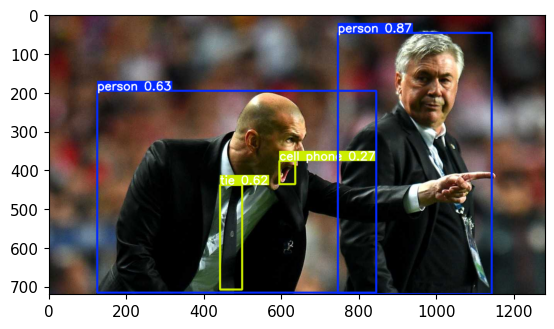

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Real Time Detections (testing)

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    # Make detections
    results = model(frame)

    cv2.imread('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

# 5. Train from scratch

In [ ]:
import uuid   # Unique identifier
import os
import time

# For Custom Dataset uncomment below code

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 8

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(10)

# Loop through image range
for img_num in range(number_imgs):
    print('Collecting images for {}, image number {}'.format(label, img_num))

    # Webcam feed
    ret, frame = cap.read()

    # Naming out image path
    imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

    # Writes out image to file
    cv2.imwrite(imgname, frame)

    # Render to the screen
    cv2.imshow('Image Collection', frame)

    # 2 second delay between captures
    time.sleep(5)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

    for label in labels:
        print('Collecting images for {}'.format(label))
        for img_num in range(number_imgs):
            print('Collecting images for {}, image number {}'.format(label, img_num))
            imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
            print(imgname)   

# Label images for custom dataset

    !git clone https://github.com/tzutalin/labelImg

    !pip install pyqt5 lxml --upgradeimport torch
    from IPython.display import Image  # for displaying images
    from utils.google_utils import gdrive_download  # for downloading models/datasets
    
    print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
    !cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# 6. Train Custom Model

In [ ]:
!cd yolov5 && python train.py --img 640 --epochs 60 --data data.yaml --weights yolov5s.pt --workers 4

# 7. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp29/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\uzair/.cache\torch\hub\master.zip
YOLOv5  2025-1-15 Python-3.10.10 torch-2.5.1+cu118 CPU

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [ ]:
img = os.path.join('data', 'test', 'images', '28_jpg.rf.7562d33f1f365fabf3db8226df66f579.jpg')

In [ ]:
results = model(img)

C:\Users\uzair/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
results.print()

image 1/1: 640x640 1 awake
Speed: 133.0ms pre-process, 709.0ms inference, 24.3ms NMS per image at shape (1, 3, 640, 640)


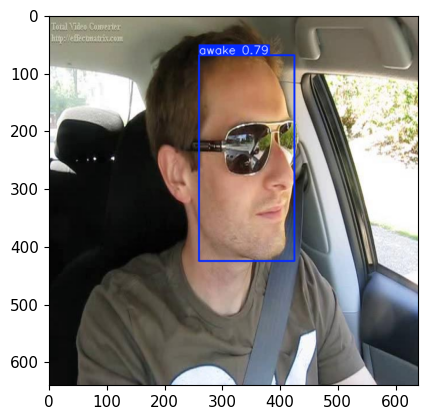

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# 8. Live Detection

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\uzair/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\uzair/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\uzair/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\uzair/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\uzair/.cache\torch\hub\ultralytics_yolov5_master\models

# 9. Performance Assessment

In [ ]:
import os
os.chdir('yolov5')

!python val.py --weights runs/train/exp29/weights/best.pt --data data.yaml --img 640 --conf-thres 0.25

val: data=data.yaml, weights=['runs/train/exp29/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.25, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
WARNING  confidence threshold 0.25 > 0.001 produces invalid results
YOLOv5  v7.0-392-gf003c3df Python-3.10.10 torch-2.5.1+cu118 CPU

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs

val: Scanning D:\code\drowsiness_detection_system\data\valid\labels...:   0%|          | 0/75 [00:00<?, ?it/s]
val: Scanning D:\code\drowsiness_detection_system\data\valid\labels... 1 images, 0 backgrounds, 0 corrupt:   1%|1         | 1/75 [00:08<10:54,  8.84s/it]
val: Scanning D:\code\drowsiness_detection_system\data\valid\labels... 9 images, 0 backgrounds, 0 corrupt:  12%|#2        | 9/75 [00:08<00:47,  1.38it/s]
val: 

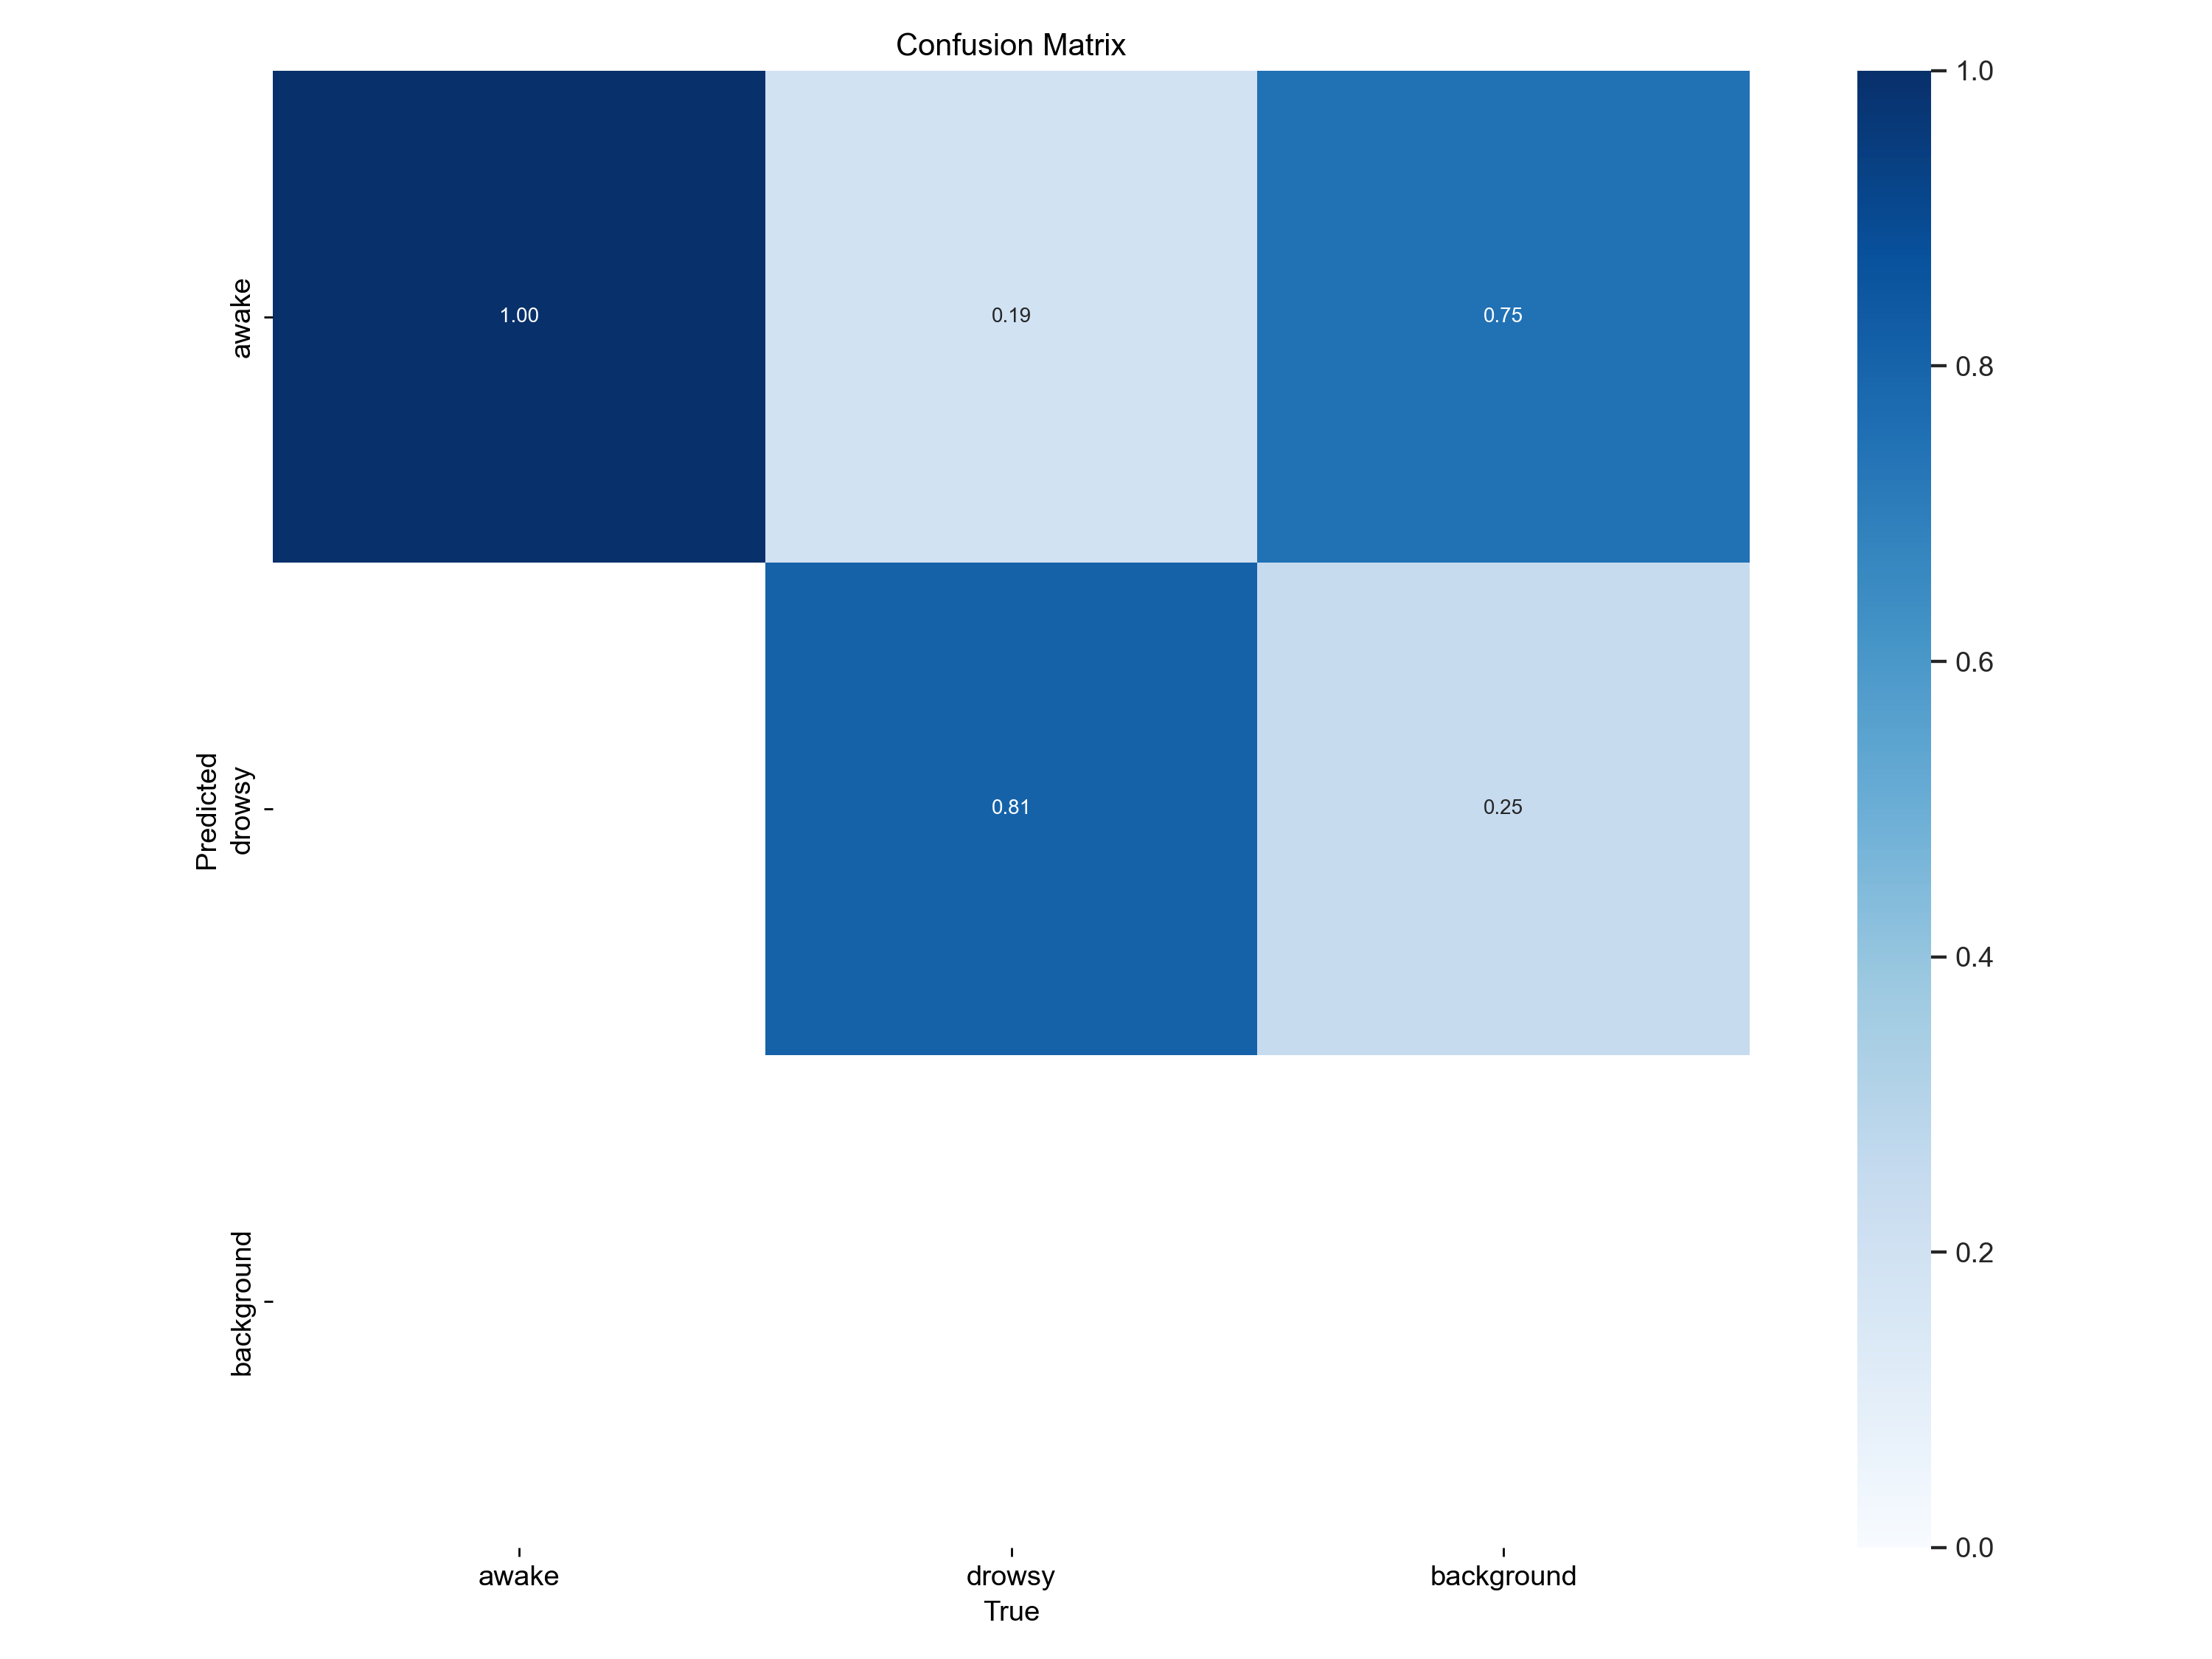

In [ ]:
from IPython.display import Image

# Display the confusion matrix
Image(filename='runs/val/exp/confusion_matrix.png')